<a href="https://colab.research.google.com/github/AJAYM888/Course_PyTorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Fundamentals

The essence of machine learning and deep learning is to take some data from the past, build an algorithm (like a neural network) to discover patterns in it and use the discovered patterns to predict the future.

There are many ways to do this and many new ways are being discovered all the time.

But let's start small.

How about we start with a straight line?

And we see if we can build a PyTorch model that learns the pattern of the straight line and matches it.

## What we're going to cover

In this module we're going to cover a standard PyTorch workflow (it can be chopped and changed as necessary but it covers the main outline of steps).

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png" width=900 alt="a pytorch workflow flowchat"/>

For now, we'll use this workflow to predict a simple straight line but the workflow steps can be repeated and changed depending on the problem you're working on.

Specifically, we're going to cover:

| **Topic** | **Contents** |
| ----- | ----- |
| **1. Getting data ready** | Data can be almost anything but to get started we're going to create a simple straight line |
| **2. Building a model** | Here we'll create a model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop**. |
| **3. Fitting the model to data (training)** | We've got data and a model, now let's let the model (try to) find patterns in the (**training**) data. |
| **4. Making predictions and evaluating a model (inference)** | Our model's found patterns in the data, let's compare its findings to the actual (**testing**) data. |
| **5. Saving and loading a model** | You may want to use your model elsewhere, or come back to it later, here we'll cover that. |
| **6. Putting it all together** | Let's take all of the above and combine it. |

In [ ]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

And now let's import what we'll need for this module.

We're going to get `torch`, `torch.nn` (`nn` stands for neural network and this package contains the building blocks for creating neural networks in PyTorch) and `matplotlib`.

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.5.1+cu121'

## 1. Data (preparing and loading)

Data can be almost anything... in ML, DL.

* Excel spreadsheet
* Images
* Videos (YT)
* Audio like podcasrs
* DNA
* Text

Machine learning, & Deep learning is a game of two parts:
1. Get data into a numberical representation.
2. Build a model to learn patterns in that numerical representation.

![](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-machine-learning-a-game-of-two-parts.png)

Sometimes one and two can be done at the same time.

To showcase this, let's create some known data using the linear regression formula. (Y = a + bx)

We'll use a liner regression formula to make a straight line with know parameters

We'll use [linear regression](https://en.wikipedia.org/wiki/Linear_regression) to create the data with known **parameters** (things that can be learned by a model) and then we'll use PyTorch to see if we can build model to estimate these parameters using [**gradient descent**](https://en.wikipedia.org/wiki/Gradient_descent).





In [3]:
# create *known* parameters

weight = 0.7 #b
bias = 0.3 #a

# create

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
 len(X), len(y)

(50, 50)

### Splitting data into training and test datasets (one of the most important concepts in ML in general)


| Split | Purpose | Amount of total data | How often is it used? |
| ----- | ----- | ----- | ----- |
| **Training set** | The model learns from this data (like the course materials you study during the semester). | ~60-80% | Always |
| **Validation set** | The model gets tuned on this data (like the practice exam you take before the final exam). | ~10-20% | Often but not always |
| **Testing set** | The model gets evaluated on this data to test what it has learned (like the final exam you take at the end of the semester). | ~10-20% | Always |


Let's create a training and test set with our data

In [4]:
# create a train/test split

train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!!!

**Visualize, Visualize, Visualize !!!!**

In [5]:
def plot_predictions(train_data= X_train,
                     train_labels= y_train,
                     test_data= X_test,
                     test_labels= y_test,
                     predictions=None):
  """
  plots training data, test data and compares predictions.
  """

  plt.figure(figsize=(10,7))

  # plot training data in blue

  plt.scatter(train_data, train_labels, c='b', s=4, label='training data')


  #plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label='testing data')

  # Are there predictions?

  if predictions is not None:
    #plot the predicitons if they exist
    plt.scatter(test_data, predicitons, c="r", s=4, label='predictions')

  # show the legends
  plt.legend(prop={"size": 14});

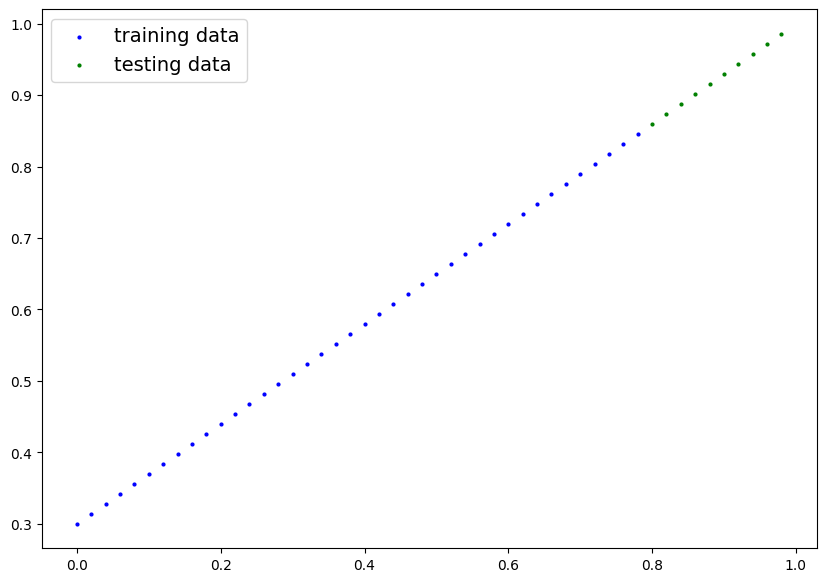

In [ ]:
plot_predictions();

## 2. Build model

Our first PyTorch model!

This is very exciting, let's goooo!!


What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or to get closer to) the ideal values (the weight & bias values we used to create the data)


How does it do so?

Through two main algorithms:

1. Gradient Descent - https://www.youtube.com/watch?v=IHZwWFHWa-w&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=2
2. Back propagation - https://www.youtube.com/watch?v=Ilg3gGewQ5U&t=208s
3. **OOP:** [Real Python's Object Orientating programming in Python 3 guide](https://realpython.com/python3-object-oriented-programming/)

In [8]:
# Create liner regression model class
from torch import nn

class LinerRegressionModel(nn.Module): # <- almost everything in pytorch inherhits from nn.module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it the ideal weight
                                            requires_grad=True, # <- can this parameter be updated via gradient descent?
                                            dtype=torch.float32)) # <- PyTorch loves the dataType torch.float32

    self.bias = nn.Parameter(torch.randn(1, # <- start with a random bias and try to adjust it to the ideal bias
                                         requires_grad=True, # <- can this parameter be updated via gradient descent?
                                         dtype=torch.float32)) # <- PyTorch loves the dataType torch.float32

    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:  # <- "x" is the input data
      return self.weights * x + self.bias # <- this is the liner regression formula



### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered as computational graphs.)
* torch.nn.parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us.
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this is where the optimizers in PyTorch live, they will help us with gradient descent and backpropagation.
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation.



PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.

They are [`torch.nn`](https://pytorch.org/docs/stable/nn.html), [`torch.optim`](https://pytorch.org/docs/stable/optim.html), [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) and [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html). For now, we'll focus on the first two and get to the other two later (though you may be able to guess what they do).

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torch.nn`](https://pytorch.org/docs/stable/nn.html) | Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way). |
| [`torch.nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter) | Stores tensors that can be used with `nn.Module`. If `requires_grad=True` gradients (used for updating model parameters via [**gradient descent**](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html))  are calculated automatically, this is often referred to as "autograd".  |
| [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) | The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method be implemented. |
| [`torch.optim`](https://pytorch.org/docs/stable/optim.html) | Contains various optimization algorithms (these tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss). |
| `def forward()` | All `nn.Module` subclasses require a `forward()` method, this defines the computation that will take place on the data passed to the particular `nn.Module` (e.g. the linear regression formula above). |

![a pytorch linear model with annotations](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-model-annotated.png)
*Basic building blocks of creating a PyTorch model by subclassing `nn.Module`. For objects that subclass `nn.Module`, the `forward()` method must be defined.*

> **Resource:** See more of these essential modules and their use cases in the [PyTorch Cheat Sheet](https://pytorch.org/tutorials/beginner/ptcheat.html).


### Checking the contents of our PyTorch model


Now we have created a model, let's see what's inside this...

So we can check our model paramters or what's inside our model using .parameters().

In [12]:
# create a random seed

RANDOM_SEED = 42

torch.manual_seed(RANDOM_SEED)

# create an instance of the model (this is a subclass of nn.module)

model_0 = LinerRegressionModel()

# check the parameters of our model

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [13]:
# List named parameters

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])